In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
print("Number of Rows: ",df.shape[0])
print ('Number of Columns :', df.shape[1])
print ('Number of Patients with outcome 1 :', df.Outcome.sum())
print ('Event Rate :', round(df.Outcome.mean()*100,2) ,'%')


Number of Rows:  768
Number of Columns : 9
Number of Patients with outcome 1 : 268
Event Rate : 34.9 %


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
from sklearn.model_selection import train_test_split

In [13]:
x=df.to_numpy()[:,0:8]
y=df.to_numpy()[:,8]
seed=42

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=seed)

In [16]:
print (f'Shape of Train Data : {x_train.shape}')
print (f'Shape of Test Data : {x_test.shape}')

Shape of Train Data : (576, 8)
Shape of Test Data : (192, 8)


In [17]:
model = Sequential([
    Input(shape=(8,)),  # Define the input shape using the new `shape` argument
    Dense(24, activation='relu'),
    Dense(12, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [18]:
# Compile the model (optional, but necessary for training)

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [20]:
# Summary of the model

model.summary()
history = model.fit(x_train, y_train, epochs=150, batch_size=32, verbose = 1)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 24)                  │             216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 529 (2.07 KB)

 Trainable params: 529 (2.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5563 - loss: 6.5570 
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6208 - loss: 3.1288 
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6016 - loss: 0.9146 
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6544 - loss: 0.7852 
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6076 - loss: 0.7403 
Epoch 6/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6485 - loss: 0.7204 
Epoch 7/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6139 - loss: 0.7042 
Epoch 8/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6426 - loss: 0.6827 
Epoch 9/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6595 - loss: 0.6634 
Epoch 10/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6680 - loss: 0.6511 
Epoch 11/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6866 - loss: 0.6213 
Epoch 12/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

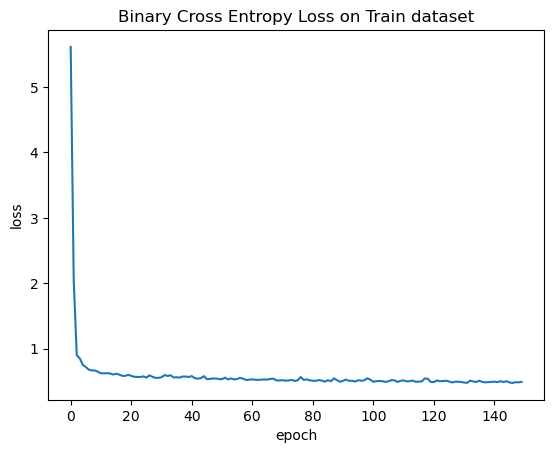

In [21]:
# Plotting loss
plt.plot(history.history['loss'])
plt.title('Binary Cross Entropy Loss on Train dataset')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

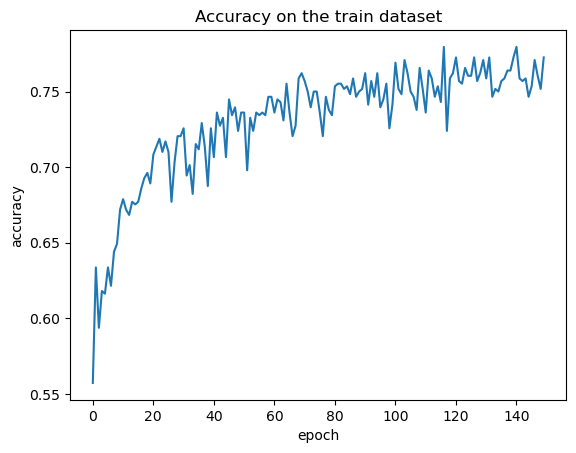

In [22]:
# Plotting accuracy metric
plt.plot(history.history['accuracy'])
plt.title('Accuracy on the train dataset')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
